# Week 4 Practical

In [ ]:
# Galton-Watson Branching Process


In [4]:
import networkx as nx

# Giant component in the configuration model
# Generate the configuration model graph
degree_sequence = [3, 2, 1] * 50
G = nx.configuration_model(degree_sequence)

# Calculate the expectation of d_I(d_I-1) divided by the expectation of d_I
expectation_dI = sum(degree_sequence) / len(degree_sequence)
expectation_dI_dI_minus_1 = sum(d * (d - 1) for d in degree_sequence) / len(degree_sequence)
expectation_ratio = expectation_dI_dI_minus_1 / expectation_dI

# Extract the size of the largest component
largest_component = max(nx.connected_components(G), key=len)
largest_component_size = len(largest_component)

expectation_ratio, largest_component_size

(1.3333333333333333, 124)

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Define the degree sequence [3, 2, 1] repeated 50 times each
degree_sequence = [3, 2, 1] * 50

# Create a configuration model graph
G = nx.configuration_model(degree_sequence)

# Remove parallel edges and self-loops to make it a simple graph
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

# Calculate the expectation of d_I and d_I(d_I-1)
degrees = np.array(degree_sequence)
E_d = np.mean(degrees)
E_d_d_minus_1 = np.mean(degrees * (degrees - 1))

# Calculate the ratio
ratio = E_d_d_minus_1 / E_d

# Extract the size of the largest component
largest_component = max(nx.connected_components(G), key=len)
size_of_largest_component = len(largest_component)

print(f"The ratio IE d_I(d_I-1) / IE d_I is: {ratio}")
print(f"The size of the largest component is: {size_of_largest_component}")


The ratio IE d_I(d_I-1) / IE d_I is: 1.3333333333333333
The size of the largest component is: 129


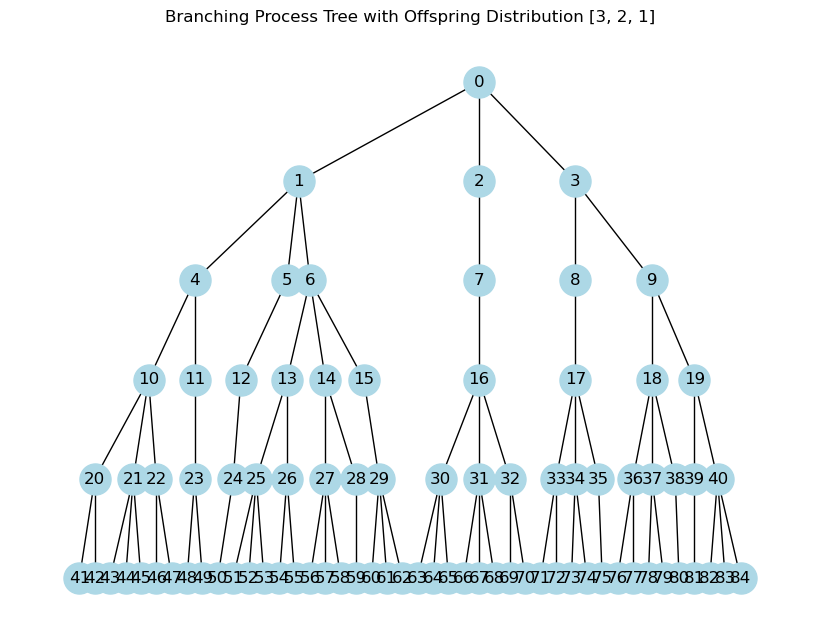

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from networkx.drawing.nx_agraph import graphviz_layout

# Simulate the Galton-Watson branching process
def branching_process(num_generations):
    tree = nx.DiGraph()  # Directed graph for the tree
    tree.add_node(0)  # Start with the root node
    nodes_in_current_generation = [0]
    node_count = 1
    
    for _ in range(num_generations):
        next_generation = []
        for node in nodes_in_current_generation:
            # Number of offspring is randomly selected from the offspring distribution
            num_offspring = random.choice([3, 2, 1])
            for _ in range(num_offspring):
                tree.add_edge(node, node_count)
                next_generation.append(node_count)
                node_count += 1
        nodes_in_current_generation = next_generation
        if not nodes_in_current_generation:
            break  # If no more nodes, stop the process

    return tree

# Simulate the branching process for 5 generations
branching_tree = branching_process(5)

# Use the graphviz_layout for hierarchical tree visualization
pos = graphviz_layout(branching_tree, prog='dot')  # 'dot' ensures tree-like structure

# Draw the graph with a tree-like structure
plt.figure(figsize=(8, 6))
nx.draw(branching_tree, pos, with_labels=True, node_size=500, node_color="lightblue", arrows=False)
plt.title("Branching Process Tree with Offspring Distribution [3, 2, 1]")
plt.show()


Number of nodes: 25
Number of edges: 181


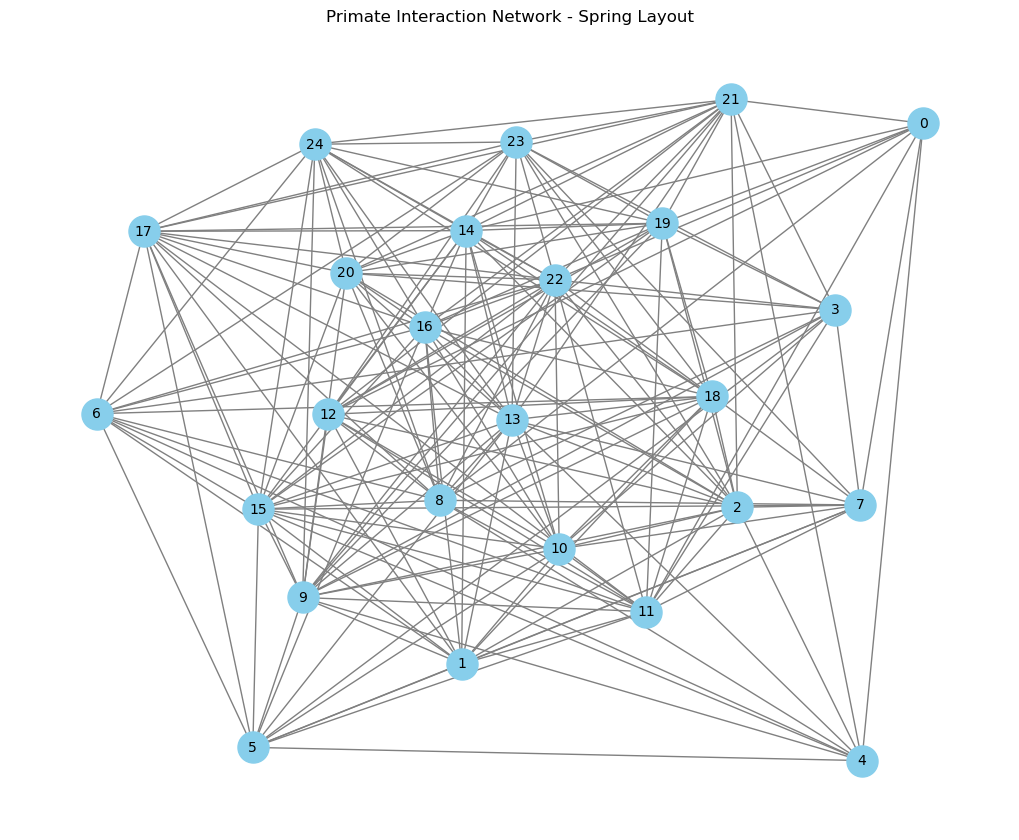

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the primate interaction graph from the GraphML file
# Replace the path with the actual location of your file
graph = nx.read_graphml('data/primate_griffin_13.graphml')

# Print the number of nodes and edges
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Visualize the graph using a spring layout
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)  # Spring layout positions the nodes in a visually appealing way
nx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10)
plt.title("Primate Interaction Network - Spring Layout")
plt.show()


In [14]:
transitivity = nx.transitivity(graph)
transitivity

0.6252983293556086

The transitivity of the original graph is: 0.6252983293556086


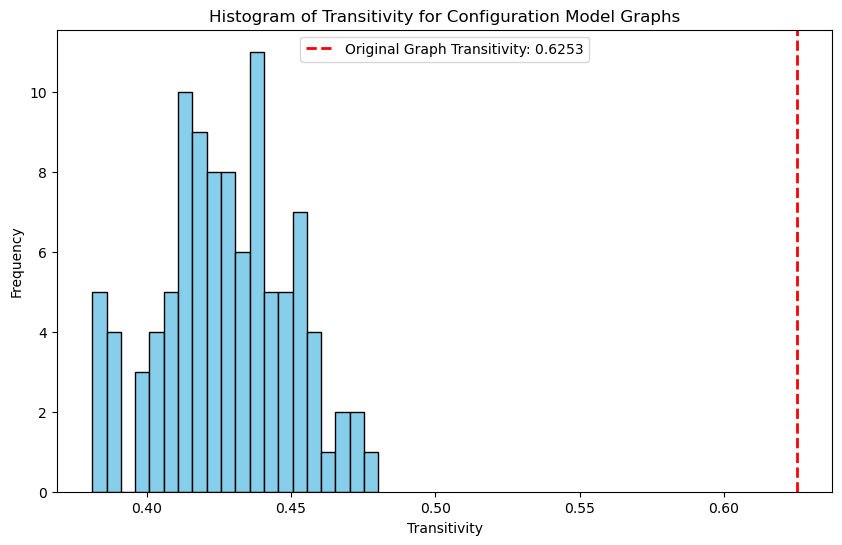

Mean transitivity of the configuration model graphs: 0.4274416036195794


In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the graph again if necessary
graph = nx.read_graphml('data/primate_griffin_13.graphml')

# Step 1: Calculate the transitivity (clustering coefficient) of the original graph
transitivity_g = nx.transitivity(graph)
print(f"The transitivity of the original graph is: {transitivity_g}")


# Step 2: Generate configuration model graphs and calculate their transitivity
degree_sequence = [d for n, d in graph.degree()]  # Get the degree sequence of the original graph
transitivity_values = []

# Step 3: Run the simulation 100 times to generate configuration models and calculate transitivity
for _ in range(100):
    # Create a configuration model graph with the same degree sequence
    config_model = nx.configuration_model(degree_sequence)
    
    # Remove parallel edges and self-loops to make it a simple graph
    config_model = nx.Graph(config_model)  # Convert to simple graph
    config_model.remove_edges_from(nx.selfloop_edges(config_model))
    
    # Calculate the transitivity of the configuration model graph
    transitivity_config = nx.transitivity(config_model)
    transitivity_values.append(transitivity_config)

# Step 4: Plot the histogram of transitivity values from the configuration models
plt.figure(figsize=(10, 6))
plt.hist(transitivity_values, bins=20, color='skyblue', edgecolor='black')
plt.axvline(transitivity_g, color='red', linestyle='dashed', linewidth=2, label=f'Original Graph Transitivity: {transitivity_g:.4f}')
plt.title("Histogram of Transitivity for Configuration Model Graphs")
plt.xlabel("Transitivity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print the mean transitivity of the configuration model graphs
mean_transitivity = np.mean(transitivity_values)
print(f"Mean transitivity of the configuration model graphs: {mean_transitivity}")